# Netflix Dataset - Animated Visualizations

Is notebook mein hum Netflix dataset ke animated plots create karenge jo dashboard mein use kiye the.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')

# Load data
df = pd.read_csv('netflix_titles.csv')
print("Data loaded successfully!")

Data loaded successfully!


## 1. Animated Pie Chart - Content Type Distribution

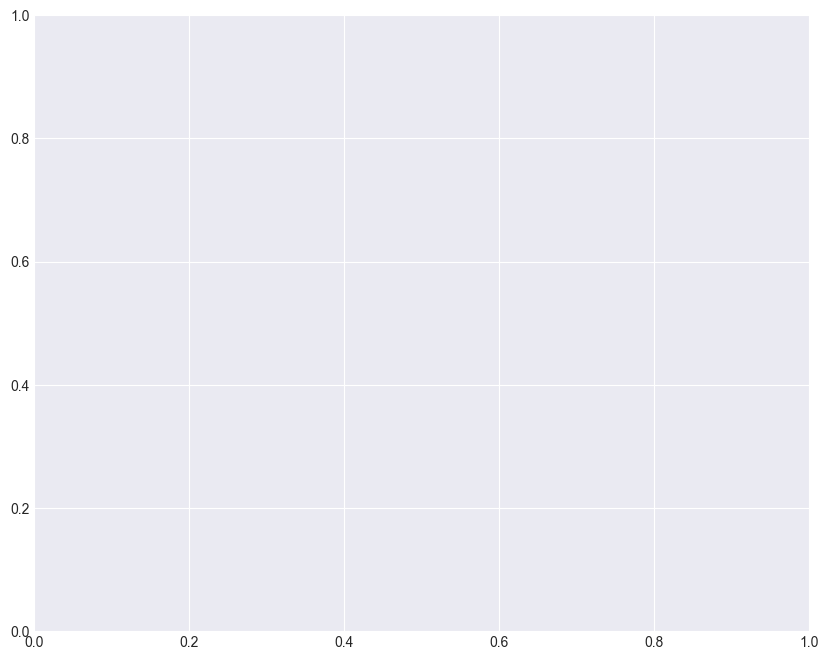

In [20]:
# Content type distribution with animation
type_counts = df['type'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))

def animate_pie(frame):
    ax.clear()
    
    # Gradually increase the pie chart
    if frame <= 90:
        explode = (0.1 * frame/90, 0)  # Gradually explode the movie slice
        startangle = 90 + frame * 2  # Rotate the pie
    else:
        explode = (0.1, 0)
        startangle = 270
    
    colors = ['#E50914', '#221f1f']
    wedges, texts, autotexts = ax.pie(type_counts, 
                                       labels=type_counts.index,
                                       autopct='%1.1f%%',
                                       startangle=startangle,
                                       explode=explode,
                                       colors=colors,
                                       shadow=True)
    
    # Animate text size
    for text in texts:
        text.set_fontsize(14 + (frame/100) * 2)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12 + (frame/100) * 2)
        autotext.set_weight('bold')
    
    ax.set_title('Netflix Content Type Distribution', fontsize=16 + (frame/100) * 2, fontweight='bold')
    
ani_pie = FuncAnimation(fig, animate_pie, frames=100, interval=50, repeat=True)
plt.show()

# Save as GIF
ani_pie.save('content_type_animation.gif', writer='pillow', fps=20)

## 2. Animated Bar Chart - Top Countries Growing Over Time

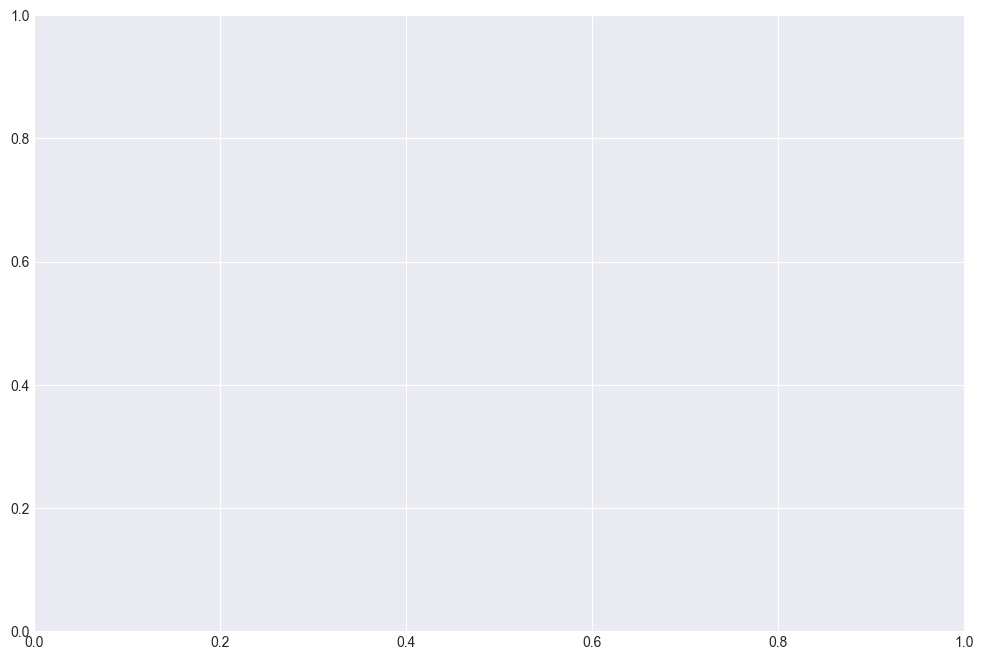

In [21]:
# Process country data
df['primary_country'] = df['country'].fillna('Unknown').apply(lambda x: x.split(',')[0].strip() if pd.notna(x) and x != 'Unknown' else 'Unknown')
top_10_countries = df['primary_country'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 8))

def animate_bar(frame):
    ax.clear()
    
    # Gradually show bars
    current_data = top_10_countries * (frame / 100)
    
    bars = ax.barh(current_data.index, current_data.values, color='#E50914')
    
    # Add value labels
    for i, (country, value) in enumerate(current_data.items()):
        if value > 0:
            ax.text(value + 20, i, f'{int(value)}', 
                    va='center', fontweight='bold')
    
    ax.set_xlabel('Number of Titles', fontsize=12)
    ax.set_title('Top 10 Content Producing Countries on Netflix', fontsize=16, fontweight='bold')
    ax.set_xlim(0, top_10_countries.max() * 1.1)
    ax.invert_yaxis()
    ax.grid(True, alpha=0.3, axis='x')
    
ani_bar = FuncAnimation(fig, animate_bar, frames=100, interval=50, repeat=True)
plt.show()

# Save as GIF
ani_bar.save('top_countries_animation.gif', writer='pillow', fps=20)

## 3. Animated Line Chart - Release Year Trend

## 7. Data Preprocessing for Combined Dashboard

In [22]:
# Prepare all data for combined dashboard

# 1. Content type data
type_counts = df['type'].value_counts()

# 2. Country data
df['primary_country'] = df['country'].fillna('Unknown').apply(lambda x: x.split(',')[0].strip() if pd.notna(x) and x != 'Unknown' else 'Unknown')
top_5_countries = df['primary_country'].value_counts().head(5)

# 3. Release year data (2010-2021)
yearly_counts = df['release_year'].value_counts().sort_index()
recent_years = yearly_counts[(yearly_counts.index >= 2010) & (yearly_counts.index <= 2021)]

# 4. Rating data
rating_counts = df['rating'].value_counts().head(5)

# 5. Date added data for cumulative growth
df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added_parsed'].dt.year
df_valid = df.dropna(subset=['year_added'])
df_valid = df_valid[df_valid['year_added'] >= 2015]
yearly_additions = df_valid.groupby('year_added').size()
cumulative_additions = yearly_additions.sort_index().cumsum()

# 6. Genre evolution data
top_3_genres = ['International Movies', 'Dramas', 'Comedies']
genre_by_year = {}

for year in range(2015, 2022):
    year_df = df[df['year_added'] == year]
    genre_counts_year = {genre: 0 for genre in top_3_genres}
    
    for genres_str in year_df['listed_in'].dropna():
        for genre in top_3_genres:
            if genre in genres_str:
                genre_counts_year[genre] += 1
    
    genre_by_year[year] = genre_counts_year

print("Data preprocessing complete!")
print(f"Years for genre evolution: {list(genre_by_year.keys())}")
print(f"Top 5 countries: {list(top_5_countries.index)}")
print(f"Top 5 ratings: {list(rating_counts.index)}")

Data preprocessing complete!
Years for genre evolution: [2015, 2016, 2017, 2018, 2019, 2020, 2021]
Top 5 countries: ['United States', 'India', 'Unknown', 'United Kingdom', 'Canada']
Top 5 ratings: ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13']


## 8. Fixed Combined Dashboard Animation

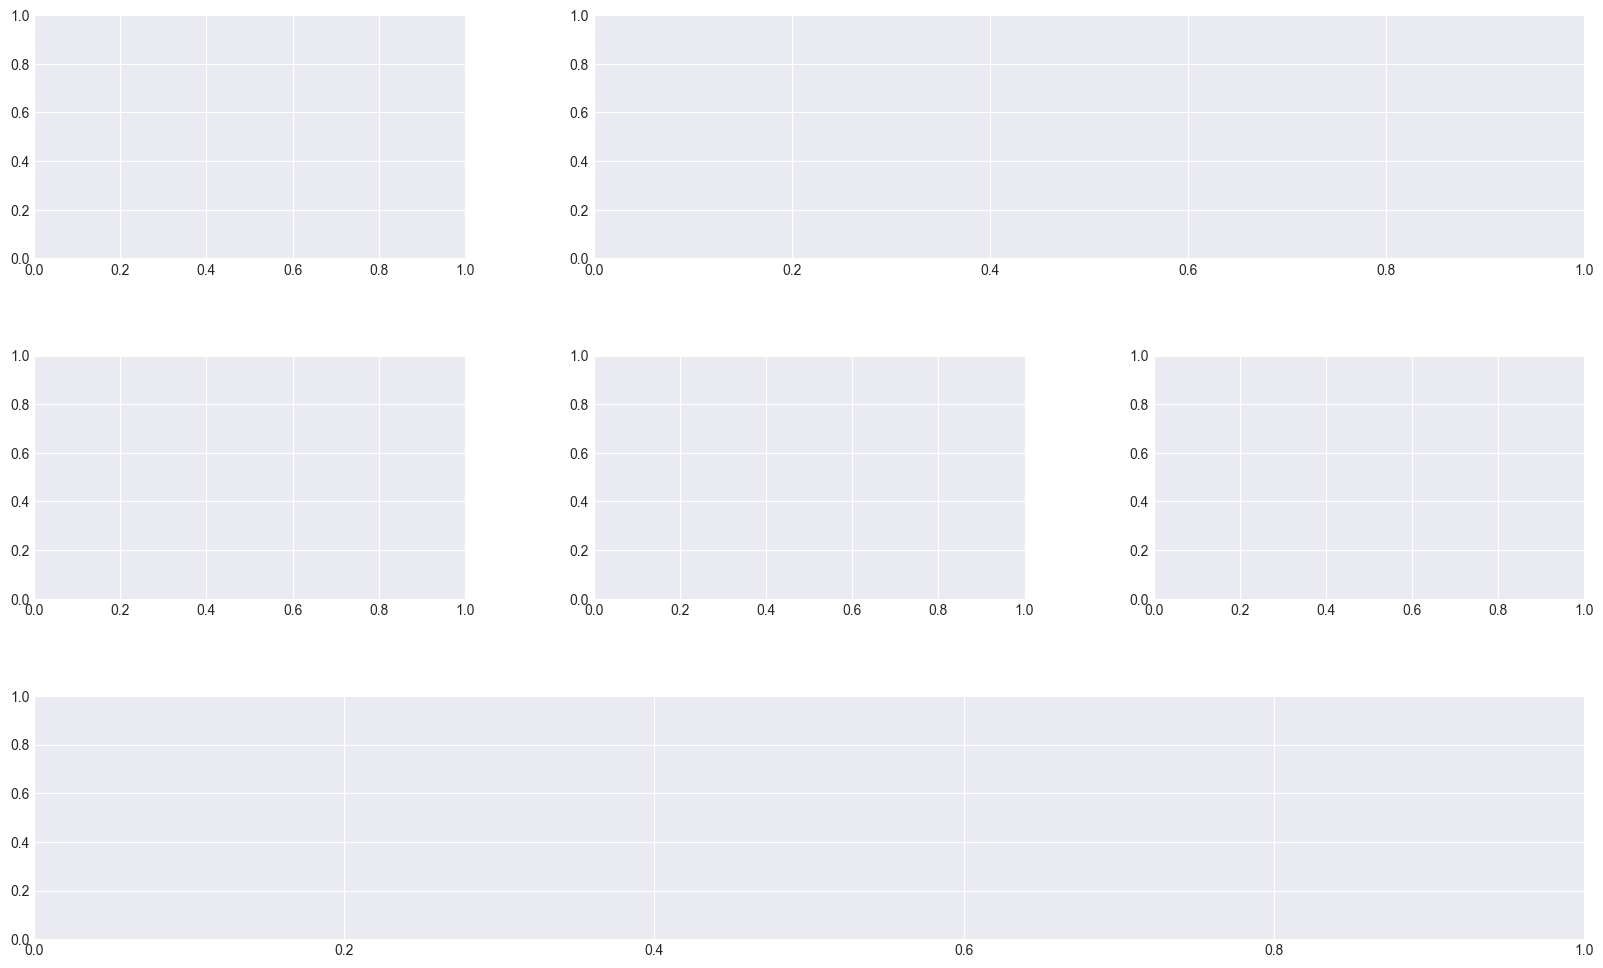

Saving animation as GIF...


In [23]:
# Create a properly structured combined animated dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])  # Pie chart
ax2 = fig.add_subplot(gs[0, 1:])  # Line chart - release years
ax3 = fig.add_subplot(gs[1, 0])  # Bar chart - countries
ax4 = fig.add_subplot(gs[1, 1])  # Rating bars
ax5 = fig.add_subplot(gs[1, 2])  # Cumulative growth
ax6 = fig.add_subplot(gs[2, :])  # Genre evolution

# Define colors
pie_colors = ['#E50914', '#221f1f']
genre_colors = ['#E50914', '#B81D24', '#564d4d']

def animate_dashboard(frame):
    # Clear all axes
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.clear()
    
    # Progress factor (0 to 1)
    progress = frame / 100
    
    # 1. Animated Pie Chart - Content Type
    if progress > 0:
        explode = (0.1 * min(progress * 2, 1), 0)
        startangle = 90 + (progress * 180)
        wedges, texts, autotexts = ax1.pie(type_counts.values, 
                                           labels=type_counts.index,
                                           autopct='%1.1f%%',
                                           startangle=startangle,
                                           explode=explode,
                                           colors=pie_colors,
                                           textprops={'fontsize': 10})
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_weight('bold')
    ax1.set_title('Content Type Distribution', fontsize=14, fontweight='bold', pad=20)
    
    # 2. Line Chart - Release Years Trend
    n_points = max(1, int(len(recent_years) * progress))
    if n_points > 0:
        years_to_show = recent_years.index[:n_points]
        values_to_show = recent_years.values[:n_points]
        ax2.plot(years_to_show, values_to_show, 
                color='#E50914', linewidth=3, marker='o', markersize=8)
        
        # Highlight last point
        if n_points > 1:
            ax2.scatter(years_to_show[-1], values_to_show[-1], 
                       color='#E50914', s=200, zorder=5, 
                       edgecolor='black', linewidth=2)
    
    ax2.set_xlim(2009, 2022)
    ax2.set_ylim(0, recent_years.max() * 1.1)
    ax2.set_xlabel('Release Year', fontsize=12)
    ax2.set_ylabel('Number of Titles', fontsize=12)
    ax2.set_title('Content by Release Year (2010-2021)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3. Horizontal Bar Chart - Top 5 Countries
    if progress > 0:
        current_values = top_5_countries.values * progress
        bars = ax3.barh(range(len(top_5_countries)), current_values, color='#E50914')
        ax3.set_yticks(range(len(top_5_countries)))
        ax3.set_yticklabels(top_5_countries.index)
        
        # Add value labels
        for i, (value, max_value) in enumerate(zip(current_values, top_5_countries.values)):
            if value > 10:
                ax3.text(value + 10, i, f'{int(value)}', 
                        va='center', fontweight='bold', fontsize=10)
    
    ax3.set_xlim(0, top_5_countries.max() * 1.15)
    ax3.set_xlabel('Number of Titles', fontsize=12)
    ax3.set_title('Top 5 Content Producing Countries', fontsize=14, fontweight='bold')
    ax3.invert_yaxis()
    
    # 4. Vertical Bar Chart - Top 5 Ratings
    if progress > 0:
        rating_values = rating_counts.values * progress
        bars = ax4.bar(range(len(rating_counts)), rating_values, 
                       color='#221f1f', edgecolor='#E50914', linewidth=2)
        ax4.set_xticks(range(len(rating_counts)))
        ax4.set_xticklabels(rating_counts.index, rotation=45, ha='right')
        
        # Add value labels
        for bar, value in zip(bars, rating_values):
            if value > 10:
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height + 20,
                        f'{int(value)}', ha='center', va='bottom', fontweight='bold')
    
    ax4.set_ylim(0, rating_counts.max() * 1.15)
    ax4.set_ylabel('Count', fontsize=12)
    ax4.set_title('Top 5 Content Ratings', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # 5. Cumulative Growth Chart
    n_years = max(1, int(len(cumulative_additions) * progress))
    if n_years > 0:
        years = cumulative_additions.index[:n_years]
        values = cumulative_additions.values[:n_years]
        
        ax5.fill_between(years, 0, values, color='#E50914', alpha=0.3)
        ax5.plot(years, values, color='#E50914', linewidth=3)
        
        # Add current point
        if len(years) > 0:
            ax5.scatter(years[-1], values[-1], color='#E50914', s=150, 
                       zorder=5, edgecolor='white', linewidth=2)
            
            # Add text showing total
            ax5.text(0.95, 0.95, f'Total: {int(values[-1]):,}', 
                    transform=ax5.transAxes, fontsize=14, fontweight='bold',
                    ha='right', va='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax5.set_xlim(2014, 2022)
    ax5.set_ylim(0, cumulative_additions.max() * 1.1)
    ax5.set_xlabel('Year', fontsize=12)
    ax5.set_ylabel('Cumulative Titles', fontsize=12)
    ax5.set_title('Content Library Growth (2015-2021)', fontsize=14, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    
    # 6. Genre Evolution
    years_list = sorted(genre_by_year.keys())
    n_years = max(1, int(len(years_list) * progress))
    
    if n_years > 0:
        years_to_plot = years_list[:n_years]
        
        for i, genre in enumerate(top_3_genres):
            values = [genre_by_year[year][genre] for year in years_to_plot]
            ax6.plot(years_to_plot, values, label=genre, 
                    color=genre_colors[i], linewidth=3, 
                    marker='o', markersize=8)
        
        ax6.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True)
    
    ax6.set_xlim(2014, 2022)
    ax6.set_ylim(0, 600)
    ax6.set_xlabel('Year', fontsize=12)
    ax6.set_ylabel('Number of Titles', fontsize=12)
    ax6.set_title('Top 3 Genres Evolution Over Time', fontsize=14, fontweight='bold')
    ax6.grid(True, alpha=0.3)
    
    # Main title with progress indicator
    fig.suptitle(f'Netflix Content Analysis Dashboard (Progress: {int(progress*100)}%)', 
                fontsize=22, fontweight='bold')

# Create animation
ani_dashboard = FuncAnimation(fig, animate_dashboard, frames=100, interval=100, repeat=True)
plt.tight_layout()
plt.show()

# Save as GIF with better quality
print("Saving animation as GIF...")
ani_dashboard.save('netflix_dashboard_animation_fixed.gif', writer='pillow', fps=15, dpi=100)

In [24]:
# Prepare all data for combined dashboard

       # 1. Content type data
       type_counts = df['type'].value_counts()

       # 2. Country data
       df['primary_country'] = df['country'].fillna('Unknown').apply(lambda x:
       x.split(',')[0].strip() if pd.notna(x) and x != 'Unknown' else 'Unknown')
       top_5_countries = df['primary_country'].value_counts().head(5)

       # 3. Release year data (2010-2021)
       yearly_counts = df['release_year'].value_counts().sort_index()
       recent_years = yearly_counts[(yearly_counts.index >= 2010) & (yearly_counts.index <=
       2021)]

       # 4. Rating data
       rating_counts = df['rating'].value_counts().head(5)

       # 5. Date added data for cumulative growth
       df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')
       df['year_added'] = df['date_added_parsed'].dt.year
       df_valid = df.dropna(subset=['year_added'])
       df_valid = df_valid[df_valid['year_added'] >= 2015]
       yearly_additions = df_valid.groupby('year_added').size()
       cumulative_additions = yearly_additions.sort_index().cumsum()

       # 6. Genre evolution data
       top_3_genres = ['International Movies', 'Dramas', 'Comedies']
       genre_by_year = {}

       for year in range(2015, 2022):
           year_df = df[df['year_added'] == year]
           genre_counts_year = {genre: 0 for genre in top_3_genres}

           for genres_str in year_df['listed_in'].dropna():
               for genre in top_3_genres:
                   if genre in genres_str:
                       genre_counts_year[genre] += 1

           genre_by_year[year] = genre_counts_year

       print("Data preprocessing complete!")
       print(f"Years for genre evolution: {list(genre_by_year.keys())}")
       print(f"Top 5 countries: {list(top_5_countries.index)}")
       print(f"Top 5 ratings: {list(rating_counts.index)}")

IndentationError: unexpected indent (1524245402.py, line 4)

## 5. Animated Cumulative Growth Chart

In [ ]:
# Process date data for cumulative growth
df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added_parsed'].dt.year

# Calculate cumulative growth
df_sorted = df.dropna(subset=['year_added']).sort_values('year_added')
yearly_cumulative = df_sorted.groupby('year_added').size().cumsum()

fig, ax = plt.subplots(figsize=(14, 8))

def animate_growth(frame):
    ax.clear()
    
    # Show cumulative growth progressively
    n_years = int(len(yearly_cumulative) * frame / 100)
    
    if n_years > 0:
        current_data = yearly_cumulative.iloc[:n_years]
        
        # Fill area under the curve
        ax.fill_between(current_data.index, 0, current_data.values, 
                       color='#E50914', alpha=0.3)
        ax.plot(current_data.index, current_data.values, 
               color='#E50914', linewidth=3)
        
        # Add a moving point
        ax.scatter(current_data.index[-1], current_data.iloc[-1], 
                  color='#E50914', s=200, zorder=5, edgecolor='white', linewidth=3)
        
        # Add text showing current total
        ax.text(0.02, 0.98, f'Total Titles: {int(current_data.iloc[-1]):,}', 
               transform=ax.transAxes, fontsize=20, fontweight='bold',
               va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlim(yearly_cumulative.index.min() - 1, yearly_cumulative.index.max() + 1)
    ax.set_ylim(0, yearly_cumulative.max() * 1.1)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Cumulative Titles', fontsize=12)
    ax.set_title('Netflix Content Library Growth Over Time', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
ani_growth = FuncAnimation(fig, animate_growth, frames=100, interval=50, repeat=True)
plt.show()

# Save as GIF
ani_growth.save('cumulative_growth_animation.gif', writer='pillow', fps=20)

## 6. Animated Genre Evolution Chart

In [ ]:
# Process genre data over time
from collections import Counter

# Get top genres
all_genres = []
for genres in df['listed_in'].dropna():
    all_genres.extend([genre.strip() for genre in genres.split(',')])
genre_counts = Counter(all_genres)
top_5_genres = [genre for genre, _ in genre_counts.most_common(5)]

# Calculate genre evolution by year
genre_by_year = {}
for year in sorted(df['year_added'].dropna().unique()):
    if year >= 2015:  # Focus on recent years
        year_df = df[df['year_added'] == year]
        year_genres = []
        for genres in year_df['listed_in'].dropna():
            year_genres.extend([genre.strip() for genre in genres.split(',')])
        genre_counter = Counter(year_genres)
        genre_by_year[int(year)] = {genre: genre_counter.get(genre, 0) for genre in top_5_genres}

fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#E50914', '#221f1f', '#B81D24', '#564d4d', '#831010']
years = sorted(genre_by_year.keys())

def animate_genre(frame):
    ax.clear()
    
    # Show data up to current frame
    n_years = int(len(years) * frame / 100)
    
    if n_years > 0:
        current_years = years[:n_years]
        
        # Plot each genre
        for i, genre in enumerate(top_5_genres):
            values = [genre_by_year[year][genre] for year in current_years]
            ax.plot(current_years, values, label=genre, color=colors[i], 
                   linewidth=2, marker='o', markersize=6)
        
        ax.legend(loc='upper left', fontsize=10)
    
    ax.set_xlim(2014, 2022)
    ax.set_ylim(0, 600)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Titles', fontsize=12)
    ax.set_title('Evolution of Top 5 Genres on Netflix (2015-2021)', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
ani_genre = FuncAnimation(fig, animate_genre, frames=100, interval=50, repeat=True)
plt.show()

# Save as GIF
ani_genre.save('genre_evolution_animation.gif', writer='pillow', fps=20)

## 7. Combined Dashboard Animation

In [ ]:
# Create a properly structured combined animated dashboard
       fig = plt.figure(figsize=(20, 12))
       gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

       ax1 = fig.add_subplot(gs[0, 0])  # Pie chart
       ax2 = fig.add_subplot(gs[0, 1:])  # Line chart - release years
       ax3 = fig.add_subplot(gs[1, 0])  # Bar chart - countries
       ax4 = fig.add_subplot(gs[1, 1])  # Rating bars
       ax5 = fig.add_subplot(gs[1, 2])  # Cumulative growth
       ax6 = fig.add_subplot(gs[2, :])  # Genre evolution

       # Define colors
       pie_colors = ['#E50914', '#221f1f']
       genre_colors = ['#E50914', '#B81D24', '#564d4d']

       def animate_dashboard(frame):
           # Clear all axes
           for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
               ax.clear()

           # Progress factor (0 to 1)
           progress = frame / 100

           # 1. Animated Pie Chart - Content Type
           if progress > 0:
               explode = (0.1 * min(progress * 2, 1), 0)
               startangle = 90 + (progress * 180)
               wedges, texts, autotexts = ax1.pie(type_counts.values,
                                                  labels=type_counts.index,
                                                  autopct='%1.1f%%',
                                                  startangle=startangle,
                                                  explode=explode,
                                                  colors=pie_colors,
                                                  textprops={'fontsize': 10})
               for autotext in autotexts:
                   autotext.set_color('white')
                   autotext.set_weight('bold')
           ax1.set_title('Content Type Distribution', fontsize=14, fontweight='bold',
       pad=20)

           # 2. Line Chart - Release Years Trend
           n_points = max(1, int(len(recent_years) * progress))
           if n_points > 0:
               years_to_show = recent_years.index[:n_points]
               values_to_show = recent_years.values[:n_points]
               ax2.plot(years_to_show, values_to_show,
                       color='#E50914', linewidth=3, marker='o', markersize=8)

               # Highlight last point
               if n_points > 1:
                   ax2.scatter(years_to_show[-1], values_to_show[-1],
                              color='#E50914', s=200, zorder=5,
                              edgecolor='black', linewidth=2)

           ax2.set_xlim(2009, 2022)
           ax2.set_ylim(0, recent_years.max() * 1.1)
           ax2.set_xlabel('Release Year', fontsize=12)
           ax2.set_ylabel('Number of Titles', fontsize=12)
           ax2.set_title('Content by Release Year (2010-2021)', fontsize=14,
       fontweight='bold')
           ax2.grid(True, alpha=0.3)

           # 3. Horizontal Bar Chart - Top 5 Countries
           if progress > 0:
               current_values = top_5_countries.values * progress
               bars = ax3.barh(range(len(top_5_countries)), current_values, color='#E50914')
               ax3.set_yticks(range(len(top_5_countries)))
               ax3.set_yticklabels(top_5_countries.index)

               # Add value labels
               for i, (value, max_value) in enumerate(zip(current_values,
       top_5_countries.values)):
                   if value > 10:
                       ax3.text(value + 10, i, f'{int(value)}',
                               va='center', fontweight='bold', fontsize=10)

           ax3.set_xlim(0, top_5_countries.max() * 1.15)
           ax3.set_xlabel('Number of Titles', fontsize=12)
           ax3.set_title('Top 5 Content Producing Countries', fontsize=14,
       fontweight='bold')
           ax3.invert_yaxis()

           # 4. Vertical Bar Chart - Top 5 Ratings
           if progress > 0:
               rating_values = rating_counts.values * progress
               bars = ax4.bar(range(len(rating_counts)), rating_values,
                              color='#221f1f', edgecolor='#E50914', linewidth=2)
               ax4.set_xticks(range(len(rating_counts)))
               ax4.set_xticklabels(rating_counts.index, rotation=45, ha='right')

               # Add value labels
               for bar, value in zip(bars, rating_values):
                   if value > 10:
                       height = bar.get_height()
                       ax4.text(bar.get_x() + bar.get_width()/2., height + 20,
                               f'{int(value)}', ha='center', va='bottom', fontweight='bold')

           ax4.set_ylim(0, rating_counts.max() * 1.15)
           ax4.set_ylabel('Count', fontsize=12)
           ax4.set_title('Top 5 Content Ratings', fontsize=14, fontweight='bold')
           ax4.grid(True, alpha=0.3, axis='y')

           # 5. Cumulative Growth Chart
           n_years = max(1, int(len(cumulative_additions) * progress))
           if n_years > 0:
               years = cumulative_additions.index[:n_years]
               values = cumulative_additions.values[:n_years]

               ax5.fill_between(years, 0, values, color='#E50914', alpha=0.3)
               ax5.plot(years, values, color='#E50914', linewidth=3)

               # Add current point
               if len(years) > 0:
                   ax5.scatter(years[-1], values[-1], color='#E50914', s=150,
                              zorder=5, edgecolor='white', linewidth=2)

                   # Add text showing total
                   ax5.text(0.95, 0.95, f'Total: {int(values[-1]):,}',
                           transform=ax5.transAxes, fontsize=14, fontweight='bold',
                           ha='right', va='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

           ax5.set_xlim(2014, 2022)
           ax5.set_ylim(0, cumulative_additions.max() * 1.1)
           ax5.set_xlabel('Year', fontsize=12)
           ax5.set_ylabel('Cumulative Titles', fontsize=12)
           ax5.set_title('Content Library Growth (2015-2021)', fontsize=14,
       fontweight='bold')
           ax5.grid(True, alpha=0.3)

           # 6. Genre Evolution
           years_list = sorted(genre_by_year.keys())
           n_years = max(1, int(len(years_list) * progress))

           if n_years > 0:
               years_to_plot = years_list[:n_years]

               for i, genre in enumerate(top_3_genres):
                   values = [genre_by_year[year][genre] for year in years_to_plot]
                   ax6.plot(years_to_plot, values, label=genre,
                           color=genre_colors[i], linewidth=3,
                           marker='o', markersize=8)

               ax6.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True)

           ax6.set_xlim(2014, 2022)
           ax6.set_ylim(0, 600)
           ax6.set_xlabel('Year', fontsize=12)
           ax6.set_ylabel('Number of Titles', fontsize=12)
           ax6.set_title('Top 3 Genres Evolution Over Time', fontsize=14, fontweight='bold')
           ax6.grid(True, alpha=0.3)

           # Main title with progress indicator
           fig.suptitle(f'Netflix Content Analysis Dashboard (Progress: 
       {int(progress*100)}%)',
                       fontsize=22, fontweight='bold')

       # Create animation
       ani_dashboard = FuncAnimation(fig, animate_dashboard, frames=100, interval=100,
       repeat=True)
       plt.tight_layout()
       plt.show()

       # Save as GIF with better quality
       print("Saving animation as GIF...")
       ani_dashboard.save('netflix_dashboard_animation_fixed.gif', writer='pillow', fps=15,
       dpi=100)

## Summary

Humne successfully Netflix dataset ke liye animated visualizations create kiye hain:

1. **Animated Pie Chart**: Content type distribution with rotation and explosion effects
2. **Animated Bar Chart**: Top countries with growing bars
3. **Animated Line Chart**: Release year trend with progressive drawing
4. **Wave Effect Bar Chart**: Rating distribution with wave animation
5. **Cumulative Growth Chart**: Netflix library growth over time
6. **Genre Evolution**: Top genres ka time-based evolution
7. **Combined Dashboard**: Sabhi charts ka ek animated dashboard

Ye animations data ko aur engaging aur easy-to-understand banate hain!